In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-norms-matrix)

In [2]:
A = [ 2 0; 1 -1 ]

2×2 Matrix{Int64}:
 2   0
 1  -1

In Julia, one uses `norm` for vector norms and for the Frobenius norm of a matrix, which is like stacking the matrix into a single vector before taking the 2-norm.

In [3]:
Fronorm = norm(A)

2.449489742783178

```{index} ! Julia; opnorm
```

Most of the time we want to use `opnorm`, which is an induced matrix norm. The default is the 2-norm.

In [4]:
twonorm = opnorm(A)

2.2882456112707374

You can get the 1-norm as well.

In [5]:
onenorm = opnorm(A, 1)

3.0

```{index} ! Julia; maximum, ! Julia; minimum, ! Julia; sum
```

According to {eq}`mxonenorm`, the matrix 1-norm is equivalent to the maximum of the sums down the columns (in absolute value).
```{tip}
:class: dropdown
Use `sum` to sum along a dimension of a matrix. You can also sum over the entire matrix by omitting the `dims` argument.
The `maximum` and `minimum` functions also work along one dimension or over an entire matrix. To get both values at once, use `extrema`.
```

In [6]:
# Sum down the rows (1st matrix dimension):
maximum( sum(abs.(A), dims=1) )   

3

Similarly, we can get the $\infty$-norm and check our formula for it.

In [7]:
infnorm = opnorm(A, Inf)

2.0

In [8]:
 # Sum across columns (2nd matrix dimension):
maximum( sum(abs.(A), dims=2) )  

2

Next we illustrate a geometric interpretation of the 2-norm. First, we will sample a lot of vectors on the unit circle in $\mathbb{R}^2$.
```{tip}
:class: dropdown
You can use functions as values, e.g., as elements of a vector. 
```

In [9]:
# Construct 601 unit column vectors.
θ = 2π * (0:1/600:1)   # type \theta then Tab
x = [ fun(t) for fun in [cos, sin], t in θ ];

```{index} ! Julia; subplots
```

To create an array of plots, start with a `plot` that has a `layout` argument, then do subsequent `plot!` calls with a `subplot` argument.

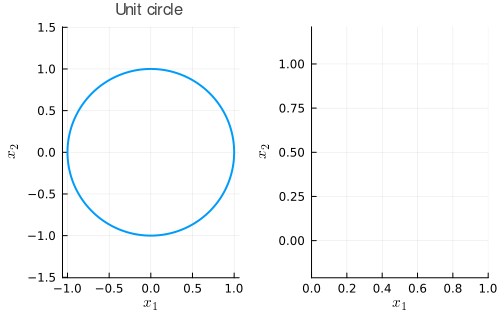

In [10]:
plot(aspect_ratio=1, layout=(1, 2),
    xlabel=L"x_1",  ylabel=L"x_2")
plot!(x[1, :], x[2, :], subplot=1, title="Unit circle") 

The linear function $\mathbf{f}(\mathbf{x}) = \mathbf{A}\mathbf{x}$ defines a mapping from $\mathbb{R}^2$ to $\mathbb{R}^2$. We can apply `A` to every column of `x` by using a single matrix multiplication.

In [11]:
Ax = A * x;

The image of the transformed vectors is an ellipse.

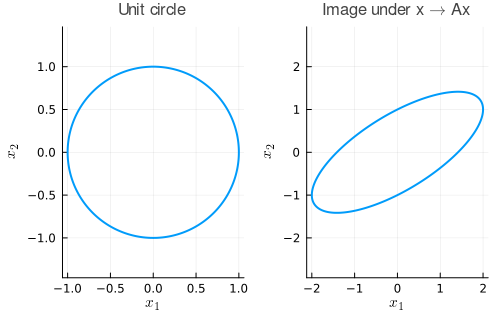

In [12]:
plot!(Ax[1, :], Ax[2, :], 
    subplot=2, title="Image under x → Ax")

That ellipse just touches the circle of radius $\|\mathbf{A}\|_2$.

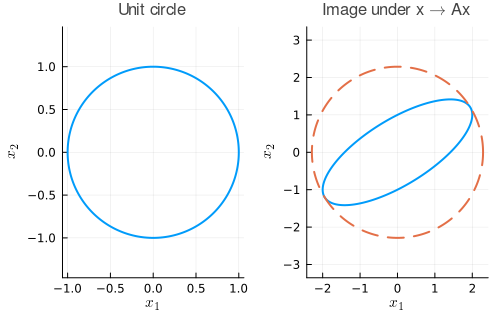

In [13]:
plot!(twonorm*x[1, :], twonorm*x[2, :], subplot=2, l=:dash)